In [1]:
import pandas as pd
import numpy as np

In [2]:
reviews=pd.read_csv("reviews.csv",error_bad_lines=False)

C:\Users\shreyank\AppData\Local\Temp\ipykernel_6708\228198644.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  reviews=pd.read_csv("reviews.csv",error_bad_lines=False)
Skipping line 134: expected 3 fields, saw 4
Skipping line 331: expected 3 fields, saw 4



In [3]:
reviews

MainReview  \
0             Touch screens are awesome.   
1                             Great buy!   
2                          Latitude 7440   
3                        The best laptop   
4                              Very Nice   
..                                   ...   
601                   Faulty motherboard   
602                      Dead on arrival   
603                          Bad Quality   
604  Hassles with installation of Win 11   
605                        Broken Device   

                                       Detailed_Review  Rating  
0      Great machine fast and I love the touch screen.       5  
1    Lightweight, easy to use. Good for day to day ...       5  
2    This system is amazing.  Sleek, fast, great re...       5  
3                       Very good laptop, thanks Dell!       5  
4    Excellent Workhorse ... Durable, Hi-Performanc...       5  
..                                                 ...     ...  
601    Dell sent me a laptop with a faulty motherboard       1  
602  Laptop dead on arrival, still waiting on a rep...       1  
603  Bad Quality, overheating, and keyboard/trackpa...       1  
604  Laptop did not come with the required security...       1  
605  Laptop is broken and Customer Support is not h...       1  

[606 rows x 3 columns]

In [4]:
reviews.head()

MainReview  \
0  Touch screens are awesome.   
1                  Great buy!   
2               Latitude 7440   
3             The best laptop   
4                   Very Nice   

                                     Detailed_Review  Rating  
0    Great machine fast and I love the touch screen.       5  
1  Lightweight, easy to use. Good for day to day ...       5  
2  This system is amazing.  Sleek, fast, great re...       5  
3                     Very good laptop, thanks Dell!       5  
4  Excellent Workhorse ... Durable, Hi-Performanc...       5

In [5]:
reviews.describe()


Rating
count  606.000000
mean     4.346535
std      1.118756
min      1.000000
25%      4.000000
50%      5.000000
75%      5.000000
max      5.000000

In [6]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606 entries, 0 to 605
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   MainReview       606 non-null    object
 1   Detailed_Review  606 non-null    object
 2   Rating           606 non-null    int64 
dtypes: int64(1), object(2)
memory usage: 14.3+ KB


In [7]:
reviews.shape

(606, 3)

In [8]:
reviews.dtypes

MainReview         object
Detailed_Review    object
Rating              int64
dtype: object

In [9]:
# Drop columns with any null values
review_dropped = reviews.dropna(axis=1)


In [10]:
review_dropped = reviews.drop_duplicates()

In [11]:
len(reviews)

606

In [12]:
reviews

MainReview  \
0             Touch screens are awesome.   
1                             Great buy!   
2                          Latitude 7440   
3                        The best laptop   
4                              Very Nice   
..                                   ...   
601                   Faulty motherboard   
602                      Dead on arrival   
603                          Bad Quality   
604  Hassles with installation of Win 11   
605                        Broken Device   

                                       Detailed_Review  Rating  
0      Great machine fast and I love the touch screen.       5  
1    Lightweight, easy to use. Good for day to day ...       5  
2    This system is amazing.  Sleek, fast, great re...       5  
3                       Very good laptop, thanks Dell!       5  
4    Excellent Workhorse ... Durable, Hi-Performanc...       5  
..                                                 ...     ...  
601    Dell sent me a laptop with a faulty motherboard       1  
602  Laptop dead on arrival, still waiting on a rep...       1  
603  Bad Quality, overheating, and keyboard/trackpa...       1  
604  Laptop did not come with the required security...       1  
605  Laptop is broken and Customer Support is not h...       1  

[606 rows x 3 columns]

In [13]:
len(reviews)

606

In [14]:
reviews.shape

(606, 3)

# Exploratory Data Analysis (EDA)

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [16]:
import warnings
warnings.filterwarnings("ignore")

<Axes: >

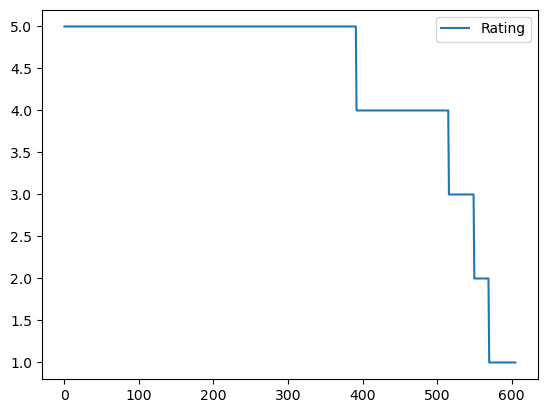

In [17]:
reviews.plot()

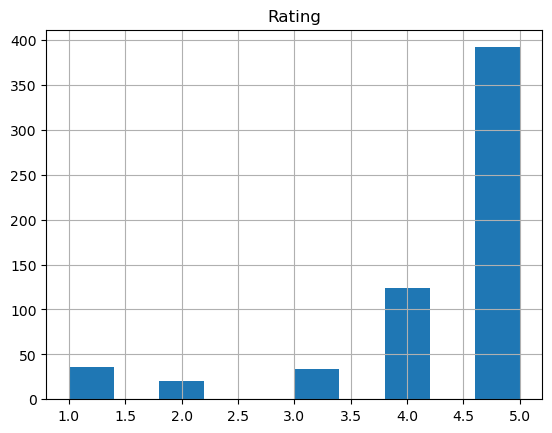

In [18]:
# create a histogram plot
from matplotlib import pyplot
reviews.hist()
pyplot.show()

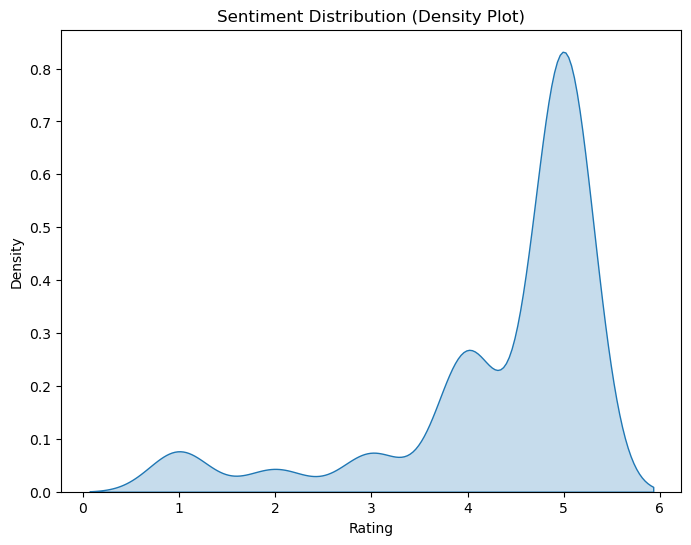

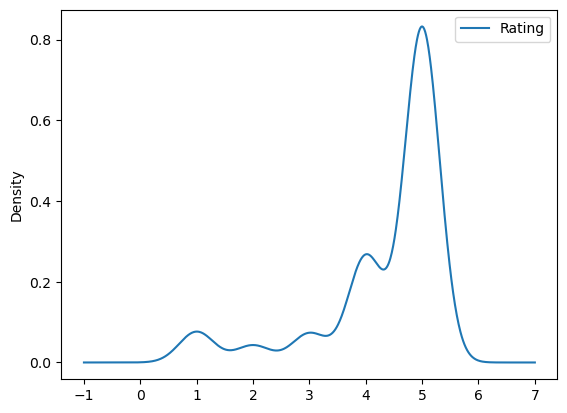

In [19]:
# create a density plot
from matplotlib import pyplot
plt.figure(figsize=(8, 6))
sns.kdeplot(data=reviews, x='Rating', fill=True)
plt.title('Sentiment Distribution (Density Plot)')
plt.xlabel('Rating')
plt.ylabel('Density')
reviews.plot(kind='kde')
plt.show()

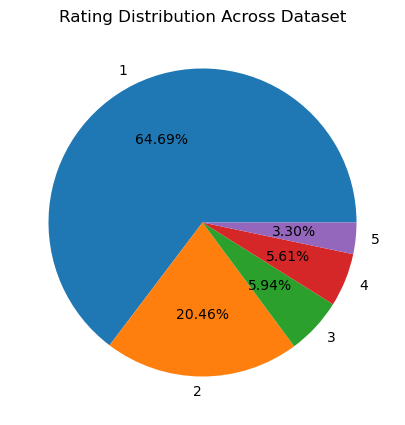

In [20]:
import matplotlib.pyplot as plt

# Assuming 'Rating' is a column in your 'reviews' DataFrame
rating_counts = reviews['Rating'].value_counts()

# Get unique ratings and sort them
unique_ratings = sorted(rating_counts.index)

# Define labels based on unique ratings
labels = [str(rating) for rating in unique_ratings]

# Plot pie chart
plt.figure(figsize=(13, 5))
plt.pie(rating_counts, labels=labels, autopct='%1.2f%%')
plt.title("Rating Distribution Across Dataset")
plt.show()


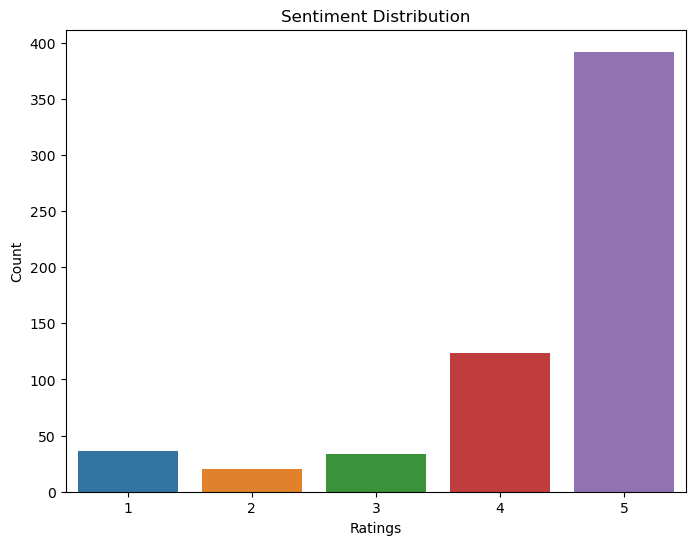

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(x='Rating', data=reviews)  # Replace 'series' with the correct DataFrame name
plt.title('Sentiment Distribution')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()



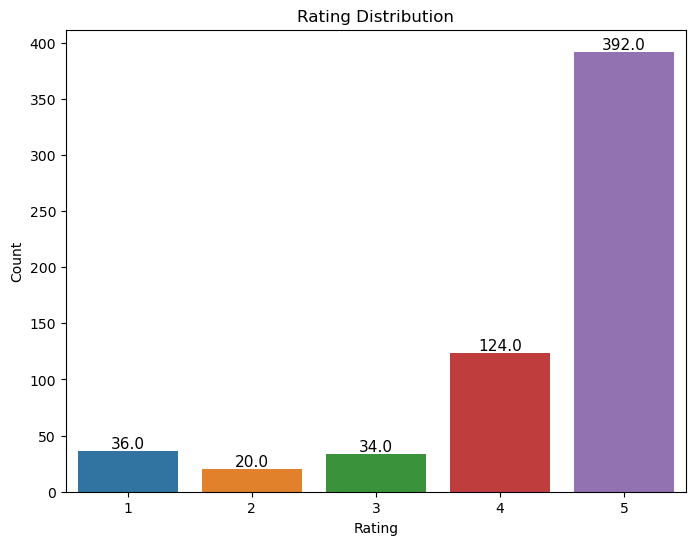

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Rating' is the correct column name
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Rating', data=reviews)

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


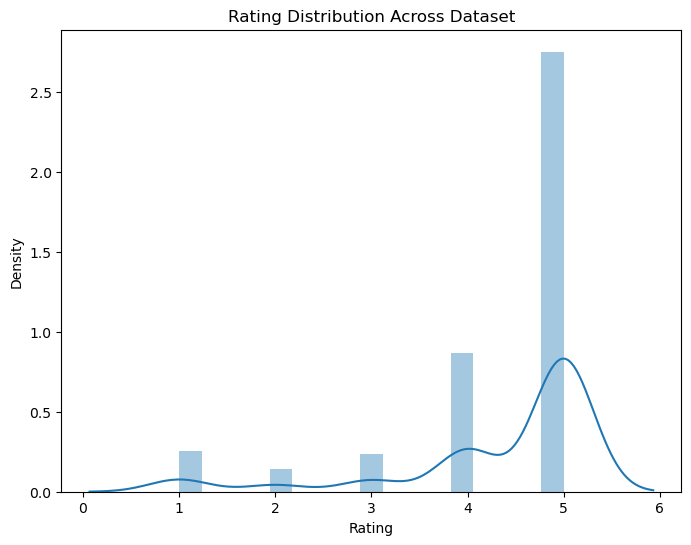

In [23]:

plt.figure(figsize=(8,6))
sns.distplot(reviews["Rating"])
plt.title("Rating Distribution Across Dataset")
plt.show()

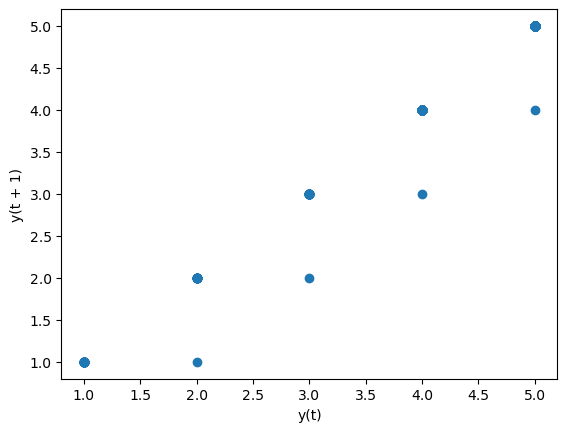

In [24]:
from matplotlib import pyplot as plt
from pandas.plotting import lag_plot

# Assuming 'review' is a pandas DataFrame and 'Rating' is the column containing time series data
lag_plot(reviews['Rating'])
plt.show()


In [25]:
# Custom Function to divide the rating into two class problem
def map_sentiment(rating):
    if rating <= 2:
        return 'Negative'
    else:
        return 'Positive'

In [26]:
# sentiment mapped into 2 class 1=Positive reviews 0=Negtaive reviews
reviews['Sentiment'] = [map_sentiment(x) for x in reviews['Rating']]
reviews.head()

MainReview  \
0  Touch screens are awesome.   
1                  Great buy!   
2               Latitude 7440   
3             The best laptop   
4                   Very Nice   

                                     Detailed_Review  Rating Sentiment  
0    Great machine fast and I love the touch screen.       5  Positive  
1  Lightweight, easy to use. Good for day to day ...       5  Positive  
2  This system is amazing.  Sleek, fast, great re...       5  Positive  
3                     Very good laptop, thanks Dell!       5  Positive  
4  Excellent Workhorse ... Durable, Hi-Performanc...       5  Positive

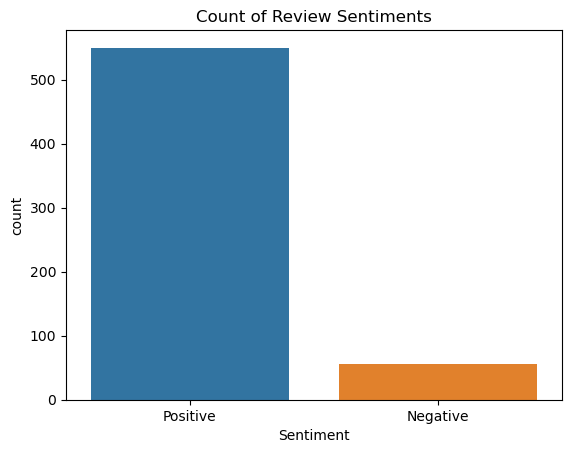

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Sentiment' is a column in your 'reviews' DataFrame
sns.countplot(data=reviews, x='Sentiment')
plt.title("Count of Review Sentiments")
plt.show()


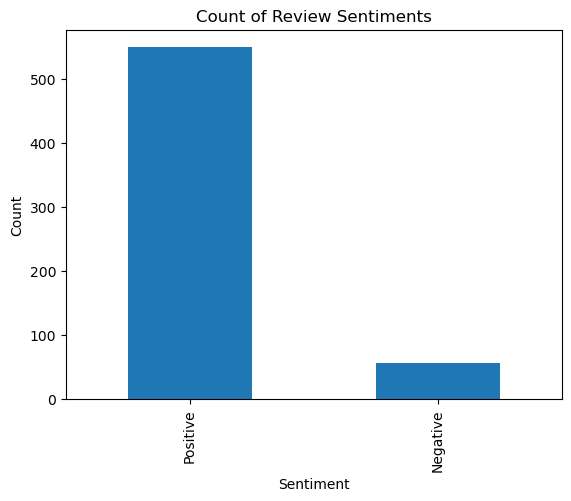

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'Sentiment' is a column in your 'reviews' DataFrame
sentiment_counts = reviews['Sentiment'].value_counts()

sentiment_counts.plot(kind='bar')
plt.title("Count of Review Sentiments")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

count    392.000000
mean       4.040816
std        2.470981
min        1.000000
25%        2.000000
50%        4.000000
75%        5.000000
max       16.000000
Name: Length, dtype: float64

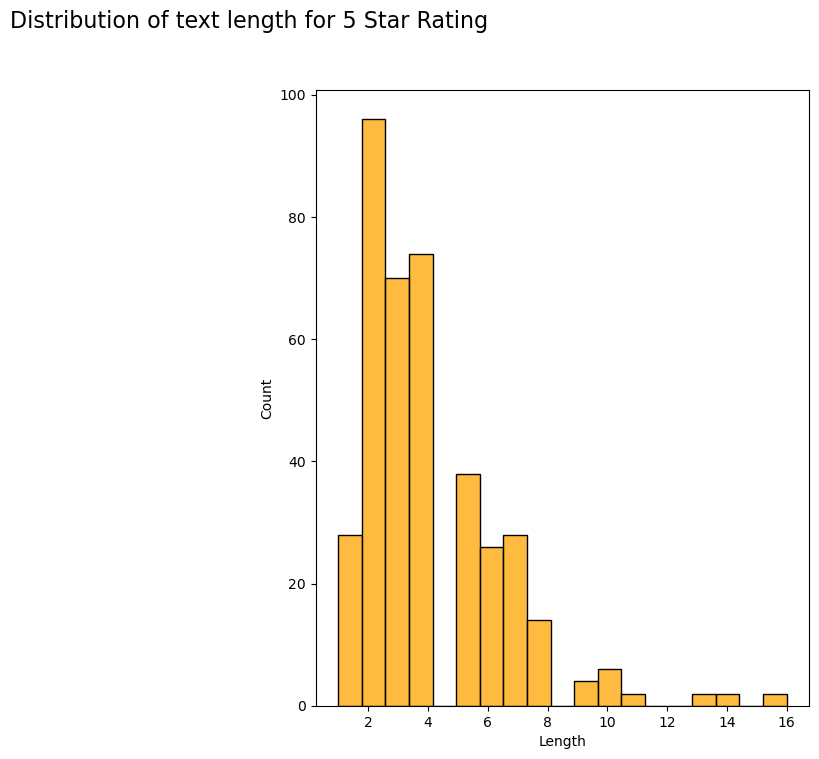

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14, 8))

# Assuming 'Review' is the column containing the text of the reviews
reviews["Length"] = reviews['MainReview'].str.split().apply(len)

ax1 = fig.add_subplot(122)
sns.histplot(reviews[reviews['Rating'] == 5]['Length'], ax=ax1, color='orange')

fig.suptitle('Distribution of text length for 5 Star Rating', fontsize=16)

# Display descriptive statistics for the length of reviews with a 5-star rating
display(reviews.Length[reviews.Rating == 5].describe())

count    392.000000
mean      30.005102
std       44.266745
min        1.000000
25%        8.000000
50%       15.500000
75%       37.250000
max      377.000000
Name: Length, dtype: float64

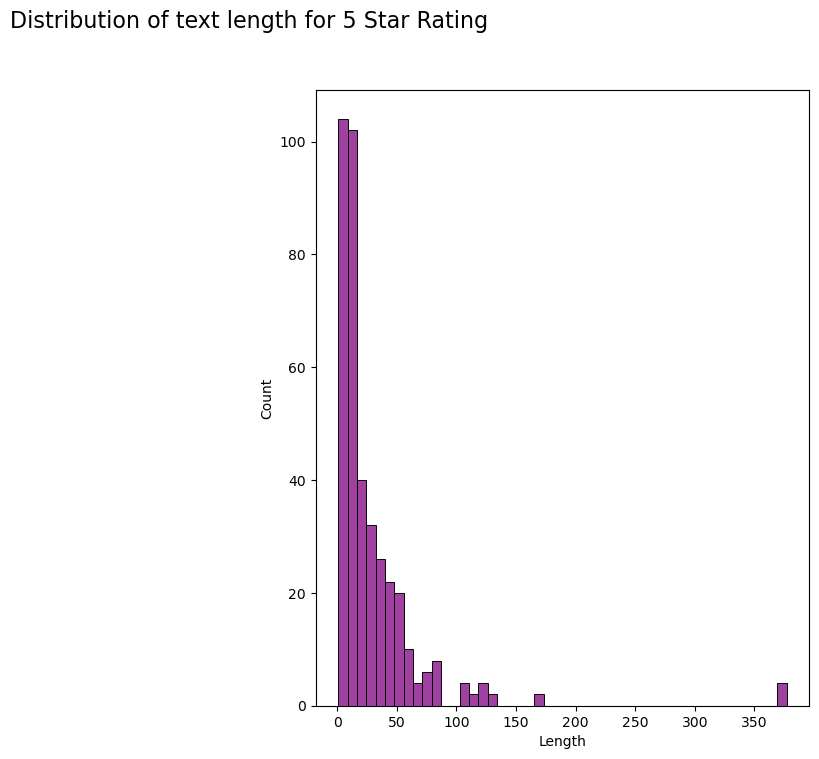

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

fig = plt.figure(figsize=(14, 8))

# Assuming 'Review' is the column containing the text of the reviews
reviews["Length"] = reviews['Detailed_Review'].str.split().apply(len)

ax1 = fig.add_subplot(122)
sns.histplot(reviews[reviews['Rating'] == 5]['Length'], ax=ax1, color='purple')

fig.suptitle('Distribution of text length for 5 Star Rating', fontsize=16)

# Display descriptive statistics for the length of reviews with a 5-star rating
display(reviews.Length[reviews.Rating == 5].describe())

# Text Preprocessing and Cleaning

In [31]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import string



In [32]:
# Download NLTK resources (run this once if you haven't already)
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shreyank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shreyank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shreyank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [33]:
# Lemmatization
from nltk.stem import WordNetLemmatizer
wordnet = WordNetLemmatizer()

# Stop word
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shreyank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [34]:
# Varibale created for words which are not included in the stopwords
not_stopwords = ("aren", "aren't", "couldn", "couldn't", "didn", "didn't",
                 "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn",
                 "hasn't", "haven", "haven't", "isn", "isn't", "mustn",
                 "mustn't", "no", "not", "only", "shouldn", "shouldn't",
                 "should've", "wasn", "wasn't", "weren", "weren't", "will",
                 "wouldn", "wouldn't", "won't", "very")
stop_words_ = [words for words in stop_words if words not in not_stopwords]

# Additional words added in the stop word list
# stop_words_.append("I")
# stop_words_.append("the")
stop_words_.append("n")
print(stop_words_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can'

In [35]:
import re
corpus = []
for i in range(0, len(reviews)):

    # Removal of puntuations
    review = re.sub('[^a-zA-Z0-9*]', ' ', reviews['MainReview'][i])

    # Converting Text to Lower case
    review = review.lower()

    # Spliting each words - eg ['I','was','happy']
    review = review.split()


    # Removal of stop words
    review = [word for word in review if word not in stop_words_]

    # Joining the words in sentences
    review = ' '.join(review)
    corpus.append(review)

In [36]:
corpus = []
for i in range(0, len(reviews)):

    # Removal of puntuations
    review = re.sub('[^a-zA-Z0-9*]', ' ', reviews['Detailed_Review'][i])

    # Converting Text to Lower case
    review = review.lower()

    # Spliting each words - eg ['I','was','happy']
    review = review.split()


    # Removal of stop words
    review = [word for word in review if word not in stop_words_]

    # Joining the words in sentences
    review = ' '.join(review)
    corpus.append(review)

In [37]:
# Stop word
stop_words_keywords = stopwords.words('english')

# special additioanl stop words added for keyword extraction
stop_words_keywords.extend(["will", "always", "go", "one", "very", "good", "only", "mr", "lot", "two",
                            "th", "etc", "don", "due", "didn", "since", "nt", "ms", "ok", "almost",
                            "put", "pm", "hyatt", "grand", "till", "add", "let", "hotel", "able",
                            "per", "st", "couldn", "yet", "par", "hi", "well", "would", "I", "the",
                            "s", "also", "great", "get", "like", "take", "thank"
                            ])

#Adding basic features from reviews

In [38]:
#adding basic features from reviews
def get_char_count(review):
    return len(review)

def get_word_count(review):
    return len(review.split(' '))

def get_average_word_length(review):
    aux=0
    for word in review.split(' '):
        aux += len(word)
    return aux/len(review.split(' '))

## Word Cloud

In [39]:
from wordcloud import WordCloud, STOPWORDS
stopwords=list(STOPWORDS)
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from textblob import TextBlob
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import re

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shreyank\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shreyank\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [40]:
#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(review, title=None):
    wordcloud = WordCloud(width = 900, height = 750, max_words=300,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(review.values))

    plt.figure(figsize = (6, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=25)
    plt.show()

In [41]:

pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [177]:

#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(reviews, title=None):
    wordcloud = WordCloud(width = 900, height = 750, max_words=300,
                          background_color ='white',
                          min_font_size = 10,
                          stopwords=['dell','laptop']
                          
                        
                         ).generate(" ".join(reviews.values))

    plt.figure(figsize = (6, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=25)
    plt.show()


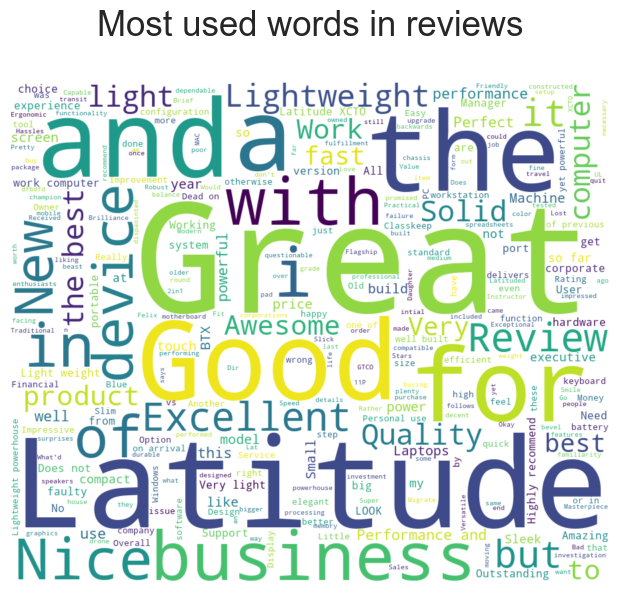

In [178]:
#Plotting the wordcloud on original data for all ratings
wordCloud_generator(reviews=reviews['MainReview'], title="Most used words in reviews\n")

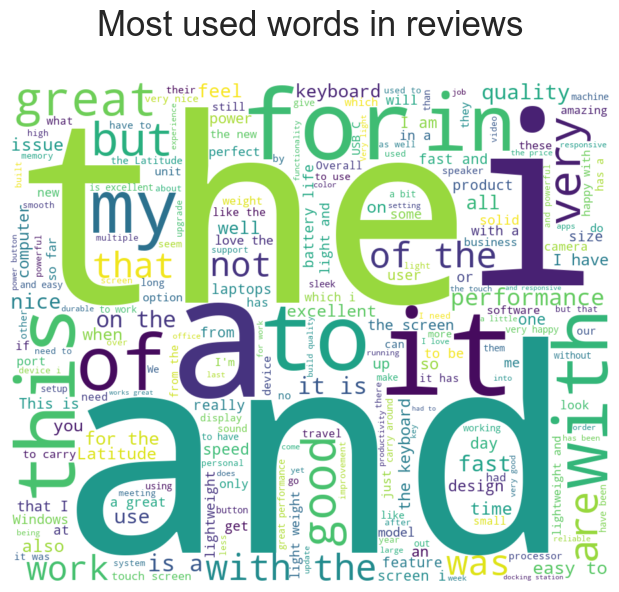

In [179]:
# file ipython-input-86-035e7fc7a9eb
wordCloud_generator(reviews=reviews['Detailed_Review'], title="Most used words in reviews\n")

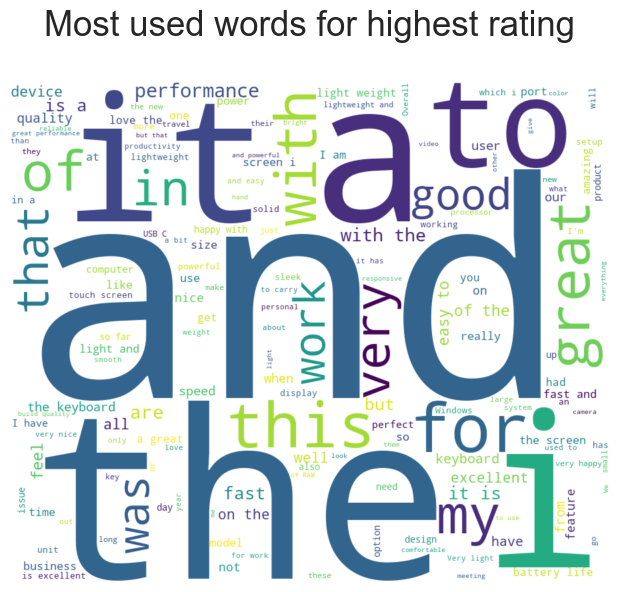

In [172]:
#Plotting the wordcloud on original data for all highest rating (5)
wordCloud_generator(reviews[reviews['Rating'] == 5]['Detailed_Review'], "Most used words for highest rating\n")


In [46]:
#Checking the most used words from reviews & plotting it using WordCloud
def wordCloud_generator(review, title=None):
    wordcloud = WordCloud(width = 1000, height = 750, max_words=300,
                          background_color ='white',
                          min_font_size = 10
                         ).generate(" ".join(review.values))

    plt.figure(figsize = (6, 5), facecolor = None)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(title,fontsize=25)
    plt.show()

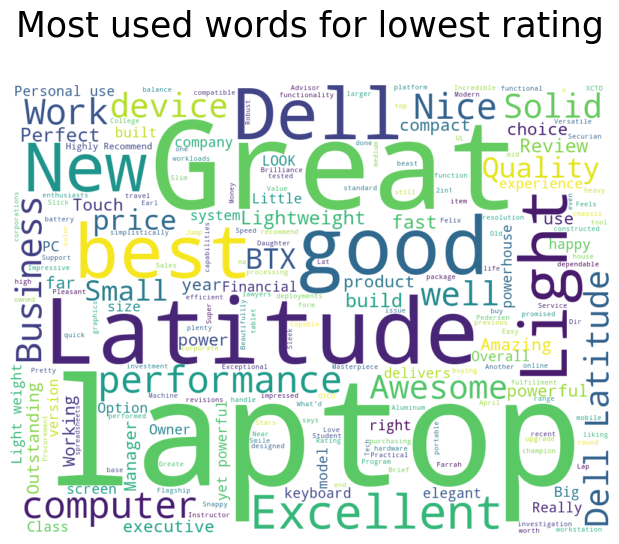

In [47]:
#Plotting t wordcloud on original data for all lowest rating (1)
wordCloud_generator(reviews[reviews['Rating'] == 5]['MainReview'], "Most used words for lowest rating\n")

# Visualization

# Most used words

In [48]:
# Reviews
import plotly.express as px
mostUsedWords = reviews['MainReview'].str.split(expand=True).stack().value_counts()
mostUsedWords_top200 = mostUsedWords[:200]

fig = px.treemap(mostUsedWords_top200, path=[mostUsedWords_top200.index], values=0)
fig.update_layout(title_text='The 200 Most Frequest Words',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [49]:
# Review
import plotly.express as px
mostUsedWords = reviews['Detailed_Review'].str.split(expand=True).stack().value_counts()
mostUsedWords_top200 = mostUsedWords[:200]

fig = px.treemap(mostUsedWords_top200, path=[mostUsedWords_top200.index], values=0)
fig.update_layout(title_text='The 200 Most Frequest Words',
                  title_x=0.5, title_font=dict(size=20)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

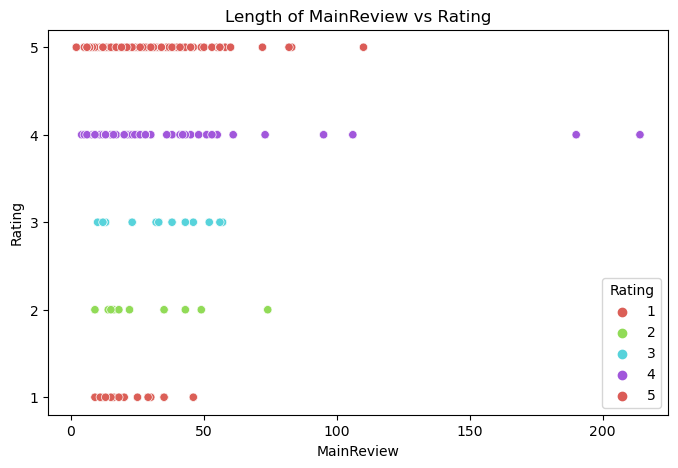

In [50]:
#Checking the length of words in a review for all the rating
plt.figure(figsize=(8,5))
sns.scatterplot(x=reviews['MainReview'].apply(len), y=reviews['Rating'], data=reviews, palette='hls', hue='Rating')
plt.title('Length of MainReview vs Rating')
plt.yticks([1,2,3,4,5])
plt.show()

# N-gram Analaysis

# Tokenisation

In [51]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
corpusdata=reviews['MainReview'].apply(word_tokenize).tolist()
len(corpusdata),reviews.shape[0]


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shreyank\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(606, 606)

In [52]:
corpusdata=reviews['Detailed_Review'].apply(word_tokenize).tolist()
len(corpusdata),reviews.shape[0]

(606, 606)

In [53]:
reviews.MainReview[0]

'Touch screens are awesome.'

In [54]:
reviews.Detailed_Review[0]

'Great machine fast and I love the touch screen.'

In [55]:
reviews

MainReview  \
0             Touch screens are awesome.   
1                             Great buy!   
2                          Latitude 7440   
3                        The best laptop   
4                              Very Nice   
..                                   ...   
601                   Faulty motherboard   
602                      Dead on arrival   
603                          Bad Quality   
604  Hassles with installation of Win 11   
605                        Broken Device   

                                       Detailed_Review  Rating Sentiment  \
0      Great machine fast and I love the touch screen.       5  Positive   
1    Lightweight, easy to use. Good for day to day ...       5  Positive   
2    This system is amazing.  Sleek, fast, great re...       5  Positive   
3                       Very good laptop, thanks Dell!       5  Positive   
4    Excellent Workhorse ... Durable, Hi-Performanc...       5  Positive   
..                                                 ...     ...       ...   
601    Dell sent me a laptop with a faulty motherboard       1  Negative   
602  Laptop dead on arrival, still waiting on a rep...       1  Negative   
603  Bad Quality, overheating, and keyboard/trackpa...       1  Negative   
604  Laptop did not come with the required security...       1  Negative   
605  Laptop is broken and Customer Support is not h...       1  Negative   

     Length  
0         9  
1        12  
2        14  
3         5  
4         8  
..      ...  
601       9  
602       9  
603       6  
604      14  
605       9  

[606 rows x 5 columns]

# **Unigram**

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
# find the most frequent words in the data, extracting information about its content and topics.
stops = set(stopwords.words('english') + ['com'])
co = CountVectorizer(stop_words=stop_words_keywords)
counts = co.fit_transform(corpus)
most_freq_terms = pd.DataFrame(counts.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0, ascending=False).head(25)

<Axes: title={'center': 'Unigram Frequency'}>

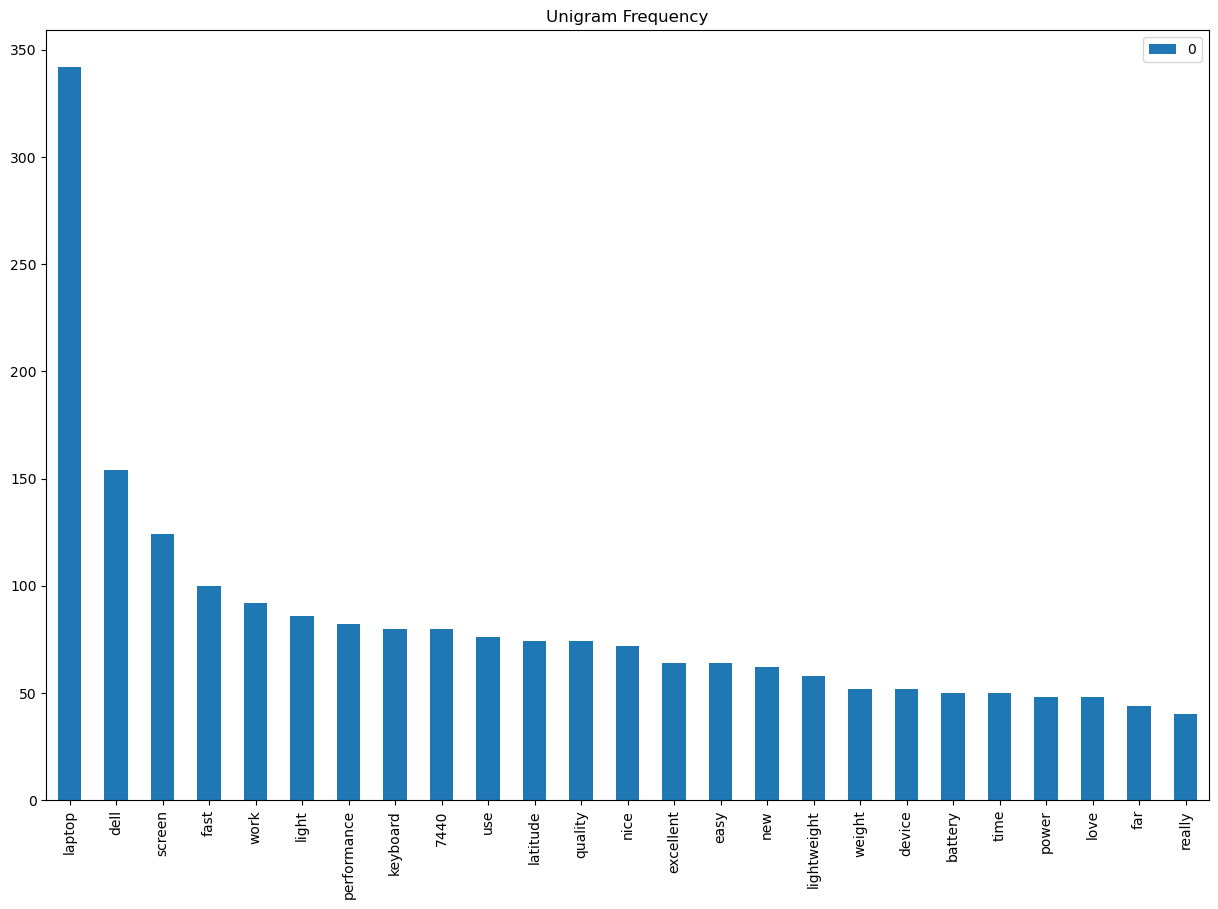

In [57]:
most_freq_terms.plot(kind='bar', title='Unigram Frequency', figsize=(15, 10))

# Bi-Grams

In [58]:
# Now we can check for frequent bi-grams:
co = CountVectorizer(ngram_range=(2, 2), stop_words=stop_words_keywords)
counts1 = co.fit_transform(corpus)
bi_grams = pd.DataFrame(counts1.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0, ascending=False).head(25)

<Axes: title={'center': 'bi-grams'}>

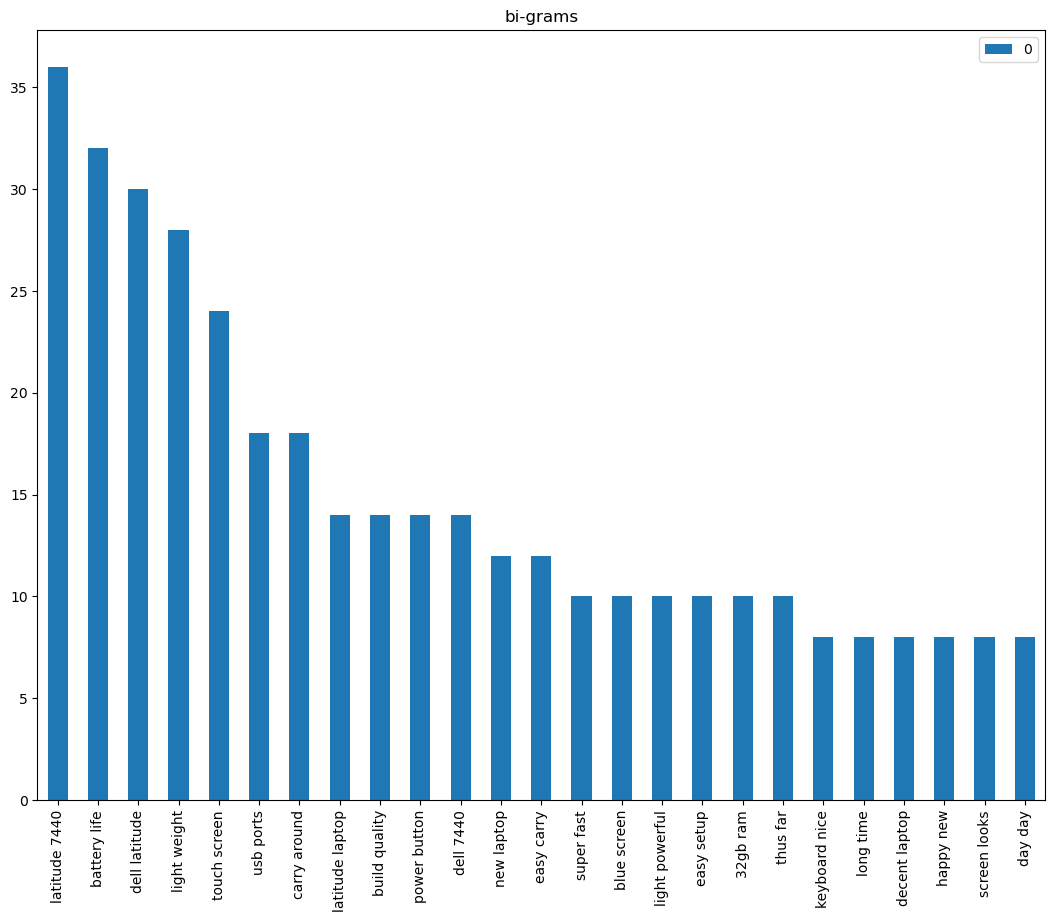

In [59]:
bi_grams.plot(kind='bar', title='bi-grams', figsize=(13, 10))

# Tri-Grams

In [60]:
# Now we can check for frequent tri gram
co = CountVectorizer(ngram_range=(3, 3), stop_words=stop_words_keywords)
counts1 = co.fit_transform(corpus)
tri_grams = pd.DataFrame(counts1.sum(axis=0),columns=co.get_feature_names_out()).T.sort_values(0, ascending=False).head(25)

<Axes: title={'center': 'tri-grams'}>

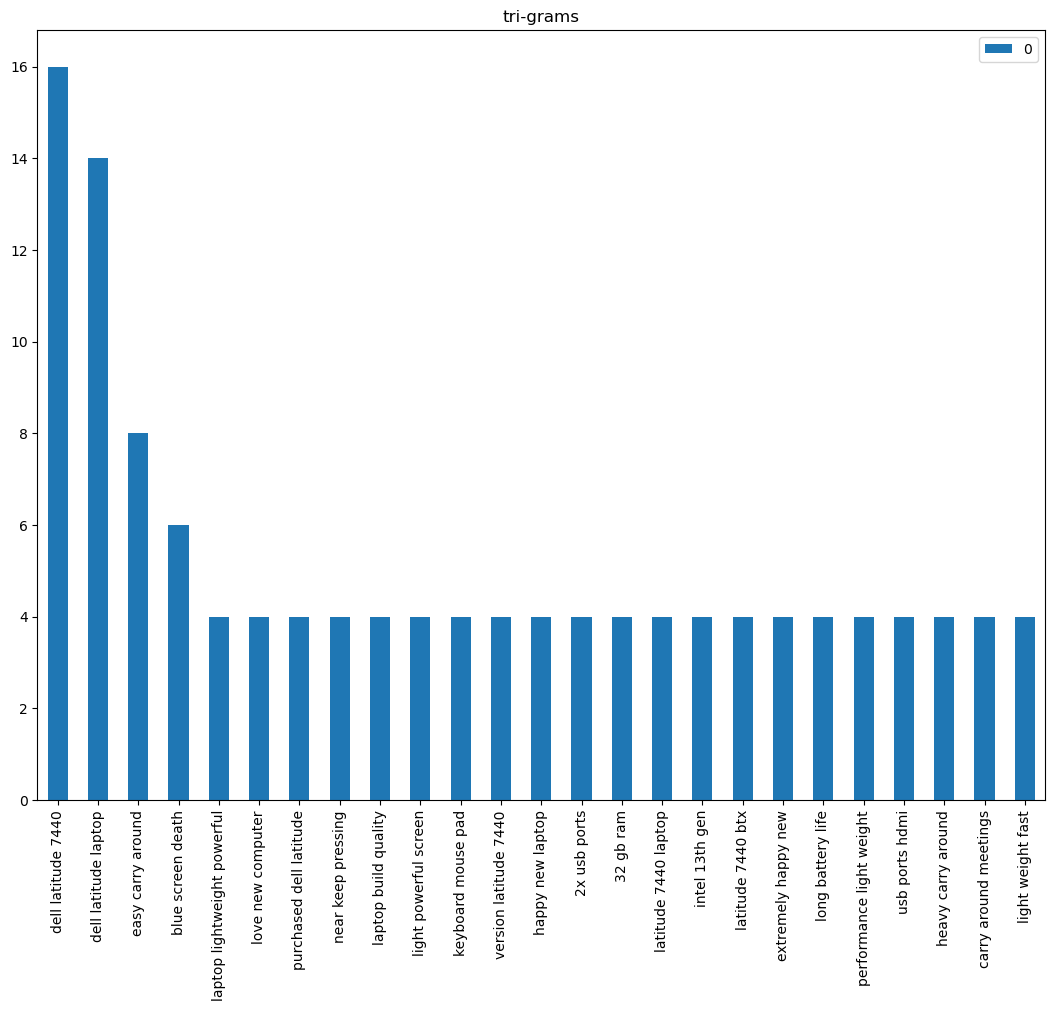

In [61]:
tri_grams.plot(kind='bar', title='tri-grams', figsize=(13, 10))

# Term Frequency and Inverse Document Frequency (TF-IDF)

# Uni-Gram

In [62]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define your list of custom stop words or set it to 'english' for predefined English stop words
stop_words_keywords = ['word1', 'word2', 'word3']  # Example custom stop words list

# Instantiate TfidfVectorizer with appropriate parameters
tfidf2 = TfidfVectorizer(norm="l2", analyzer='word', stop_words=stop_words_keywords, ngram_range=(1, 1))

# Converting text into vectors by TFIDF
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(tfidf2_x.sum(axis=0), columns=tfidf2.get_feature_names_out()).T.sort_values(0, ascending=False).head(25)


<Axes: title={'center': 'most frequent terms & their frequency'}>

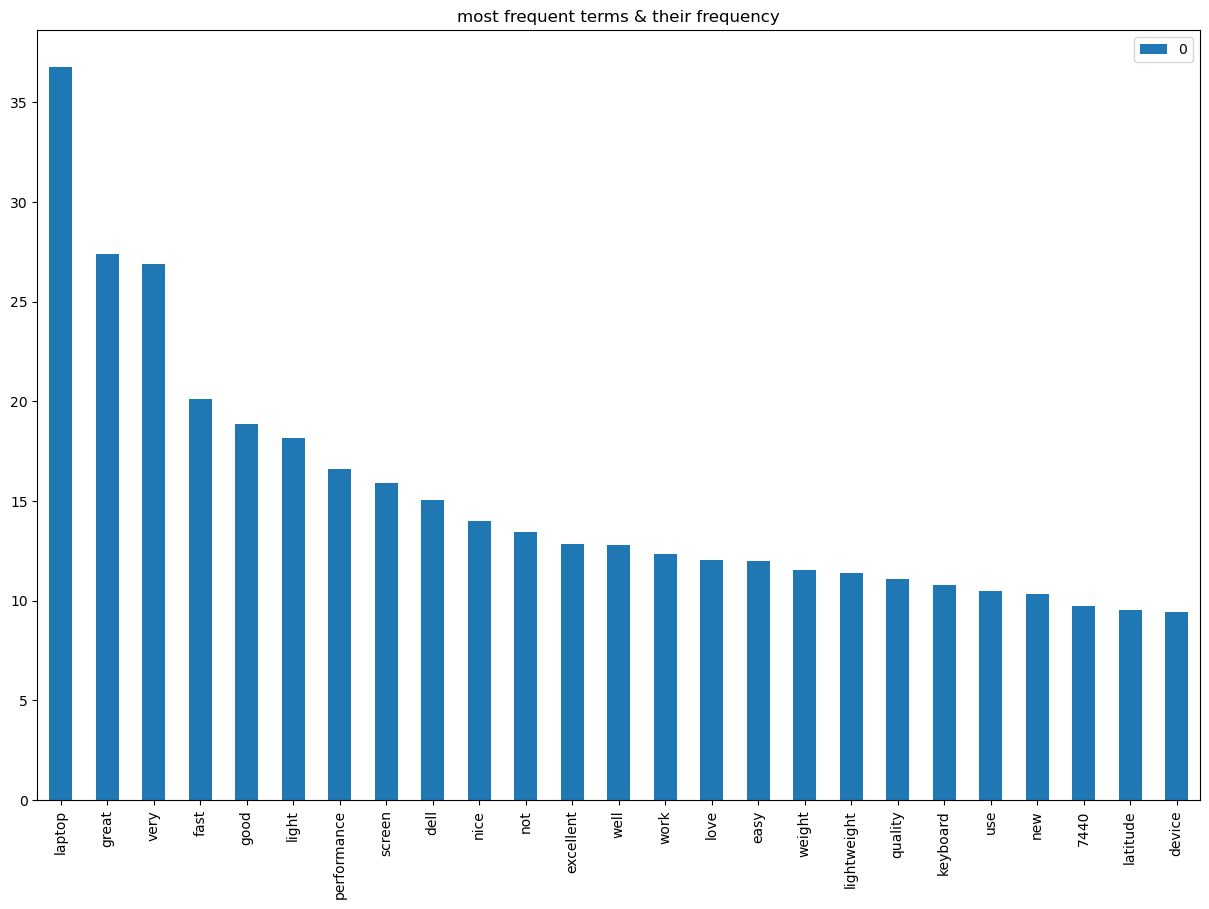

In [63]:
most_freq_terms.plot(kind='bar',title='most frequent terms & their frequency',figsize=(15, 10))

# Bi-Gram

In [64]:
# Now we can check for frequent bi-grams:

tfidf2 = TfidfVectorizer(norm="l2",analyzer='word',stop_words=stop_words_keywords,ngram_range=(2, 2))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(tfidf2_x.sum(axis=0),columns=tfidf2.get_feature_names_out()).T.sort_values(0,ascending=False).head(25)

<Axes: title={'center': 'Bi-Gram'}>

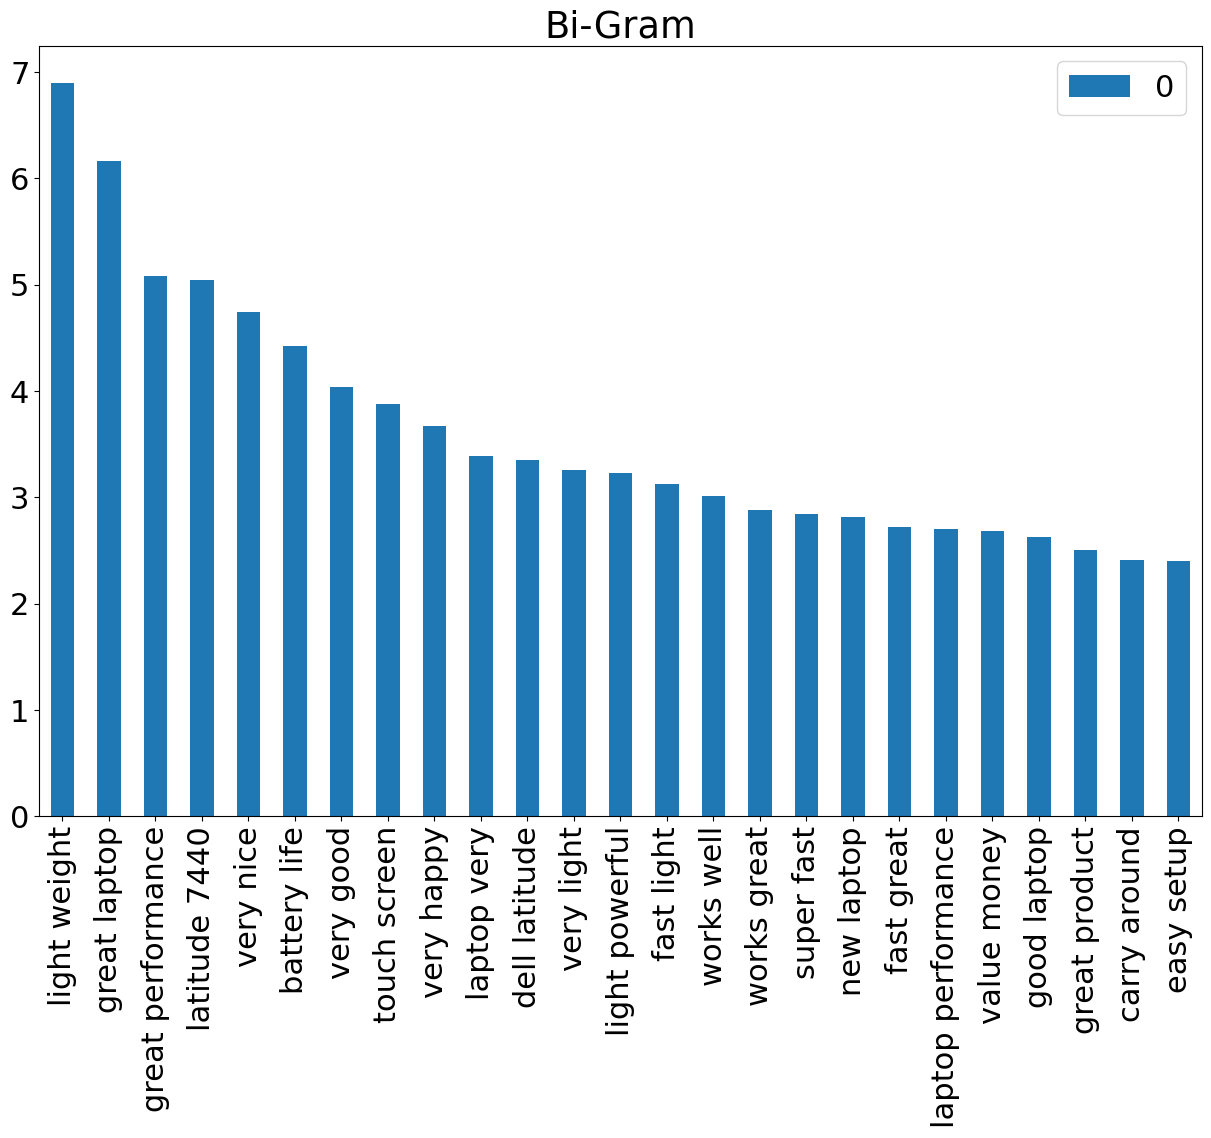

In [65]:
plt.rcParams.update({'font.size': 22})
most_freq_terms.plot(kind='bar', title='Bi-Gram', figsize=(15, 10))

# Tri-Grams

In [66]:
# Now we can check for frequent tri-grams:

tfidf2 = TfidfVectorizer(norm="l2",analyzer='word',stop_words=stop_words_keywords,ngram_range=(3, 3))
tfidf2_x = tfidf2.fit_transform(corpus)
most_freq_terms = pd.DataFrame(tfidf2_x.sum(axis=0),columns=tfidf2.get_feature_names_out()).T.sort_values(0,ascending=False).head(25)

<Axes: title={'center': 'Tri-Gram'}>

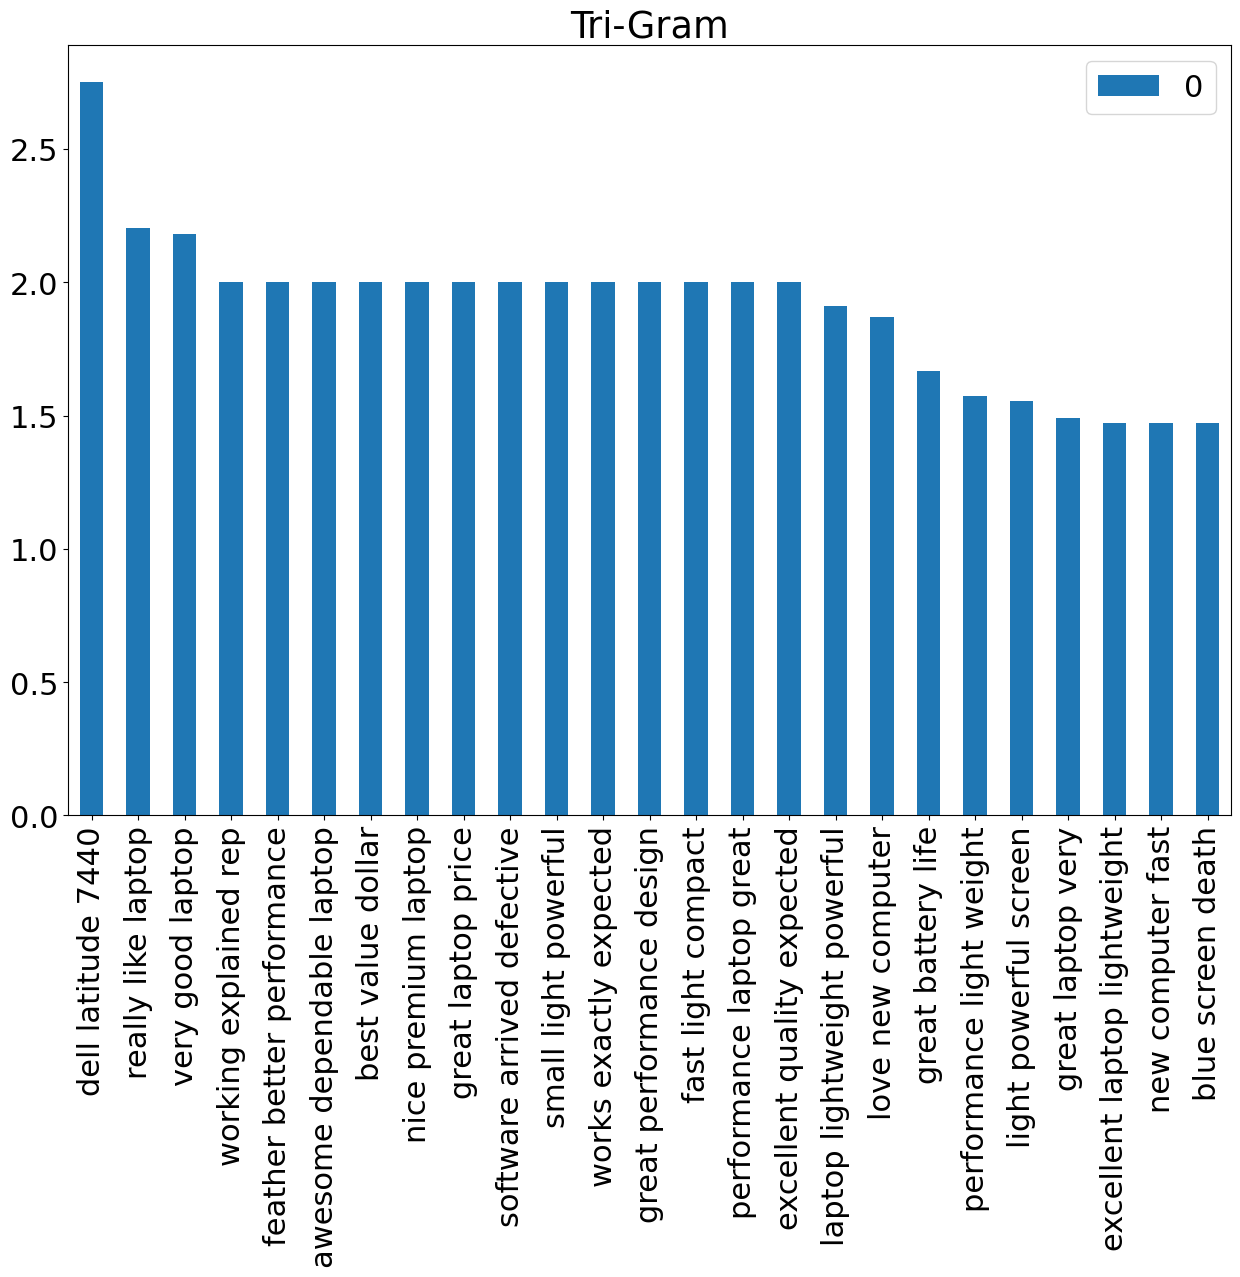

In [67]:
plt.rcParams.update({'font.size': 22})
most_freq_terms.plot(kind='bar', title='Tri-Gram', figsize=(15, 10))

# Sentiment Analysis

# Vader lexicon

In [68]:
import pandas as pd
import numpy as np

import string
import re    #for regex
import nltk
from nltk.corpus import stopwords

from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer


In [69]:
nltk.download('vader_lexicon')
sentiment_object=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\shreyank\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [70]:
#pip install -U textblob

In [72]:
reviews=pd.read_csv("reviews.csv",error_bad_lines=False)

Skipping line 134: expected 3 fields, saw 4
Skipping line 331: expected 3 fields, saw 4



In [73]:
reviews

MainReview  \
0             Touch screens are awesome.   
1                             Great buy!   
2                          Latitude 7440   
3                        The best laptop   
4                              Very Nice   
..                                   ...   
601                   Faulty motherboard   
602                      Dead on arrival   
603                          Bad Quality   
604  Hassles with installation of Win 11   
605                        Broken Device   

                                       Detailed_Review  Rating  
0      Great machine fast and I love the touch screen.       5  
1    Lightweight, easy to use. Good for day to day ...       5  
2    This system is amazing.  Sleek, fast, great re...       5  
3                       Very good laptop, thanks Dell!       5  
4    Excellent Workhorse ... Durable, Hi-Performanc...       5  
..                                                 ...     ...  
601    Dell sent me a laptop with a faulty motherboard       1  
602  Laptop dead on arrival, still waiting on a rep...       1  
603  Bad Quality, overheating, and keyboard/trackpa...       1  
604  Laptop did not come with the required security...       1  
605  Laptop is broken and Customer Support is not h...       1  

[606 rows x 3 columns]

In [74]:
reviews.head()

MainReview  \
0  Touch screens are awesome.   
1                  Great buy!   
2               Latitude 7440   
3             The best laptop   
4                   Very Nice   

                                     Detailed_Review  Rating  
0    Great machine fast and I love the touch screen.       5  
1  Lightweight, easy to use. Good for day to day ...       5  
2  This system is amazing.  Sleek, fast, great re...       5  
3                     Very good laptop, thanks Dell!       5  
4  Excellent Workhorse ... Durable, Hi-Performanc...       5

In [75]:
#lets add sentiment using vader sentiment

def get_sentiment_vader(review):
    sentiment_dict= sentiment_object.polarity_scores(review)
    if sentiment_dict['compound'] >=0.05 :
        return ('Positive')
    elif sentiment_dict['compound'] <=0.05 :
        return ('Negative')
    else:
        return('Neutral')

In [76]:
reviews['sentiment_Vader'] = reviews.MainReview.apply(lambda x: get_sentiment_vader(x))

In [77]:
reviews['sentiment_Vader'] = reviews.Detailed_Review.apply(lambda x: get_sentiment_vader(x))

In [78]:
reviews

MainReview  \
0             Touch screens are awesome.   
1                             Great buy!   
2                          Latitude 7440   
3                        The best laptop   
4                              Very Nice   
..                                   ...   
601                   Faulty motherboard   
602                      Dead on arrival   
603                          Bad Quality   
604  Hassles with installation of Win 11   
605                        Broken Device   

                                       Detailed_Review  Rating sentiment_Vader  
0      Great machine fast and I love the touch screen.       5        Positive  
1    Lightweight, easy to use. Good for day to day ...       5        Positive  
2    This system is amazing.  Sleek, fast, great re...       5        Positive  
3                       Very good laptop, thanks Dell!       5        Positive  
4    Excellent Workhorse ... Durable, Hi-Performanc...       5        Positive  
..                                                 ...     ...             ...  
601    Dell sent me a laptop with a faulty motherboard       1        Negative  
602  Laptop dead on arrival, still waiting on a rep...       1        Negative  
603  Bad Quality, overheating, and keyboard/trackpa...       1        Negative  
604  Laptop did not come with the required security...       1        Positive  
605  Laptop is broken and Customer Support is not h...       1        Negative  

[606 rows x 4 columns]

In [79]:
#Drawn a positive sample for testing the sentiment
reviews['MainReview'][1]

'Great buy!'

In [80]:
#Drawn a positive sample for testing the sentiment
reviews['Detailed_Review'][1]

'Lightweight, easy to use. Good for day to day work as intended'

In [81]:
print(reviews.columns)

Index(['MainReview', 'Detailed_Review', 'Rating', 'sentiment_Vader'], dtype='object')


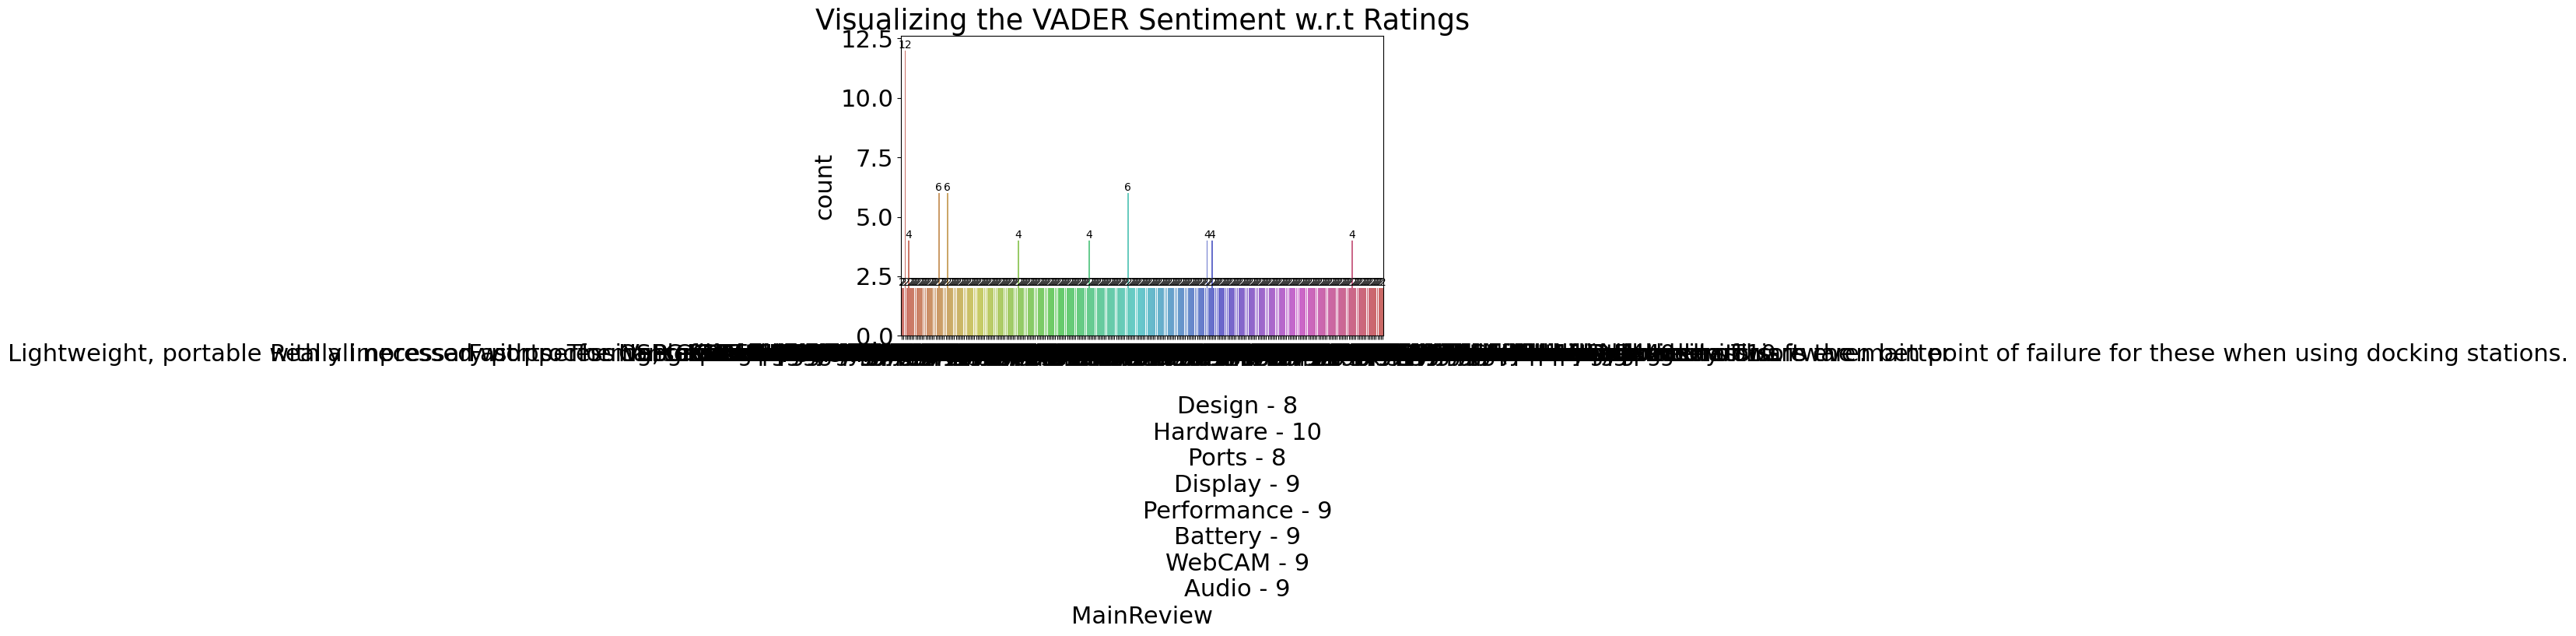

Total Count of Sentiments

Great machine fast and I love the touch screen.                                                                                                           0.330033
Good laptop but battery don't last long. Not good for travel.                                                                                             0.330033
The Bluetooth sometimes doesn't work or will connect to the device but not for the audio but other than that I love it!                                   0.330033
So far we've had great results with this laptop.  It seems Dell has ironed out some of the ssd and driver issues with the past  couple of generations.    0.330033
Laptop works great. We needed a solid laptop for the field that had 5g. This ticked every box. We also purchased the dock which works great as well.      0.330033
                                                                                                                                                            ..

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.title("Visualizing the VADER Sentiment w.r.t Ratings")

ax = sns.countplot(data=reviews, x='MainReview', palette='hls')

# Adding labels on top of each bar
for i in ax.patches:
    ax.annotate(f'{i.get_height():.0f}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

print('Total Count of Sentiments\n')
print(reviews['Detailed_Review'].value_counts(normalize=True) * 100, '\n')


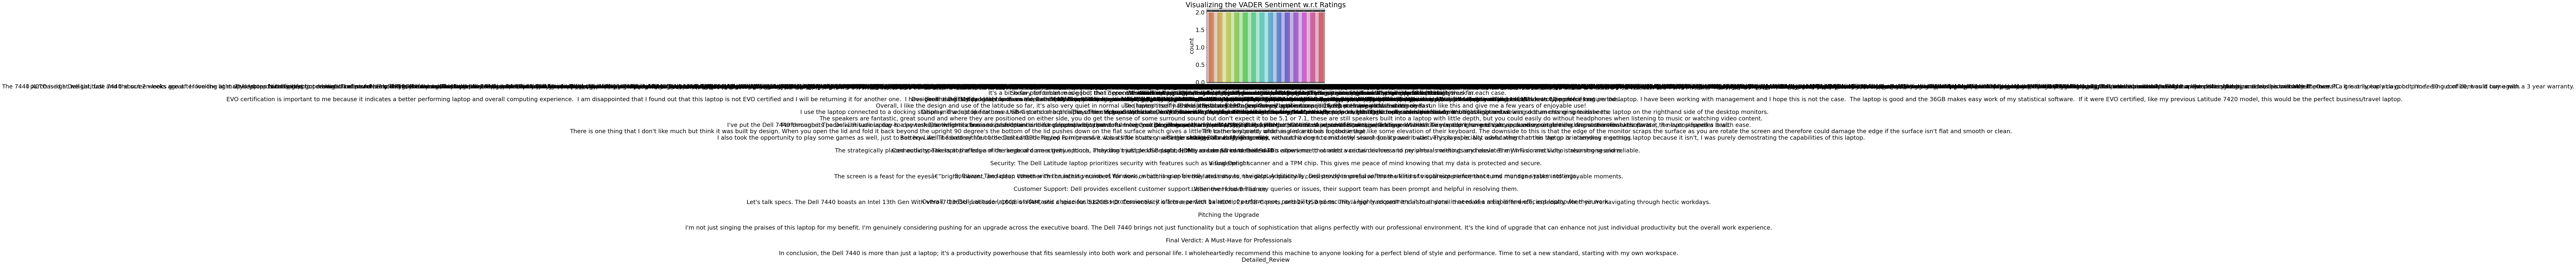

Total Count of Sentiments

Great machine fast and I love the touch screen.                                                                                                           0.330033
Good laptop but battery don't last long. Not good for travel.                                                                                             0.330033
The Bluetooth sometimes doesn't work or will connect to the device but not for the audio but other than that I love it!                                   0.330033
So far we've had great results with this laptop.  It seems Dell has ironed out some of the ssd and driver issues with the past  couple of generations.    0.330033
Laptop works great. We needed a solid laptop for the field that had 5g. This ticked every box. We also purchased the dock which works great as well.      0.330033
                                                                                                                                                            ..

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
plt.title("Visualizing the VADER Sentiment w.r.t Ratings")

ax = sns.countplot(data=reviews, x='Detailed_Review', palette='hls')

# Adding labels on top of each bar
for i in ax.patches:
    ax.annotate(f'{i.get_height():.0f}', (i.get_x() + i.get_width() / 2., i.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.show()

print('Total Count of Sentiments\n')
print(reviews['Detailed_Review'].value_counts(normalize=True) * 100, '\n')


# Polarity Sentiments Analysis

In [86]:
from wordcloud import WordCloud
sns.set_style("darkgrid")
plt.rcParams.update({'font.size': 15})
import plotly.express as px

In [87]:
polarity = []
subjectivity = []
for i in reviews['MainReview']:
    p = TextBlob(i).sentiment.polarity
    s = TextBlob(i).sentiment.subjectivity
    polarity.append(p)
    subjectivity.append(s)

In [88]:
reviews['polarity'] = polarity
reviews['subjectivity'] = subjectivity

In [89]:
Polarity_sentiment = [1 if polarity > 0 else 0 for polarity in reviews['polarity']]
# Polarity_sentiment = ['Positive' if polarity > 0 else 'Negative' for polarity in data['polarity']]
Polarity_sentiment_Nue = ['Positive' if polarity > 0 else 'Nuetral' if polarity ==0 else 'Negative' for polarity in reviews['polarity']]

In [90]:
reviews['Polarity_sentiment'] = Polarity_sentiment
reviews['Polarity_sentiment_Nue'] = Polarity_sentiment_Nue

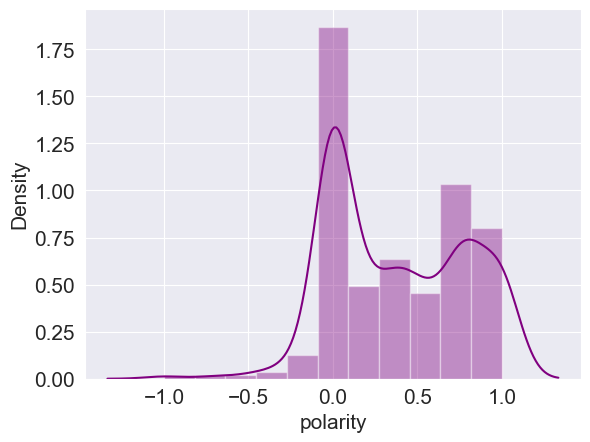

In [91]:
# Polarity score visualization
sns.distplot(reviews['polarity'], color='Purple');

In [92]:
from collections import Counter

Class: 1, Number: 382, Percentage 63.04
Class: 0, Number: 224, Percentage 36.96


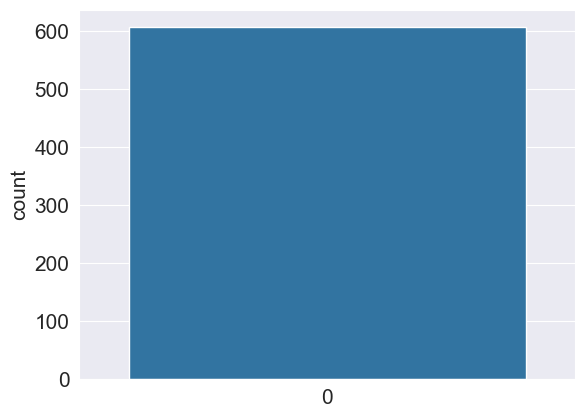

In [93]:
sns.countplot(reviews['Polarity_sentiment'])
counter = Counter(reviews['Polarity_sentiment'])
counter.items()

# Percentage of Data as per polarity Sentiment, Huge diffrence in the two classes..!!
for k, v in counter.items():
    per = v / reviews.shape[0] * 100
    print("Class: {}, Number: {}, Percentage {}".format(k, v, np.round(per, 2)))

Count of each sentiment label:
 dict_items([('Positive', 382), ('Nuetral', 200), ('Negative', 24)])


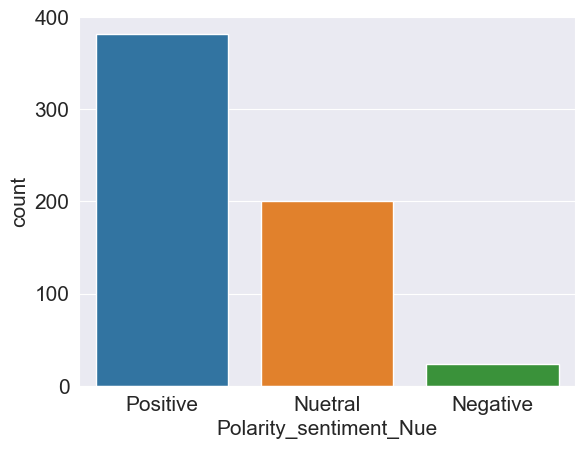

In [94]:
import seaborn as sns
from collections import Counter

# Visualizing the count of sentiment labels
sns.countplot(data=reviews, x='Polarity_sentiment_Nue')

# Getting the count of each sentiment label
counter = Counter(reviews['Polarity_sentiment_Nue'])
print('Count of each sentiment label:\n', counter.items())

In [95]:
#let add sentiment using Textblob sentimet
def get_sentiment_textblob(review):
    sentimet_score=TextBlob(review).sentiment.polarity

    if sentimet_score<0:
        return 'Negative'
    elif sentimet_score>=0 and sentimet_score<=0.2:
        return 'Neutral'
    else:
        return 'Positive'

In [96]:
reviews['sentiment_textblob'] = reviews.MainReview.apply(lambda x:get_sentiment_textblob(x))

In [97]:
reviews['sentiment_textblob'] = reviews.Detailed_Review.apply(lambda x:get_sentiment_textblob(x))

In [98]:
reviews

MainReview  \
0             Touch screens are awesome.   
1                             Great buy!   
2                          Latitude 7440   
3                        The best laptop   
4                              Very Nice   
..                                   ...   
601                   Faulty motherboard   
602                      Dead on arrival   
603                          Bad Quality   
604  Hassles with installation of Win 11   
605                        Broken Device   

                                       Detailed_Review  Rating  \
0      Great machine fast and I love the touch screen.       5   
1    Lightweight, easy to use. Good for day to day ...       5   
2    This system is amazing.  Sleek, fast, great re...       5   
3                       Very good laptop, thanks Dell!       5   
4    Excellent Workhorse ... Durable, Hi-Performanc...       5   
..                                                 ...     ...   
601    Dell sent me a laptop with a faulty motherboard       1   
602  Laptop dead on arrival, still waiting on a rep...       1   
603  Bad Quality, overheating, and keyboard/trackpa...       1   
604  Laptop did not come with the required security...       1   
605  Laptop is broken and Customer Support is not h...       1   

    sentiment_Vader  polarity  subjectivity  Polarity_sentiment  \
0          Positive      1.00      1.000000                   1   
1          Positive      1.00      0.750000                   1   
2          Positive      0.00      0.000000                   0   
3          Positive      1.00      0.300000                   1   
4          Positive      0.78      1.000000                   1   
..              ...       ...           ...                 ...   
601        Negative      0.00      0.000000                   0   
602        Negative     -0.20      0.400000                   0   
603        Negative     -0.70      0.666667                   0   
604        Positive      0.80      0.400000                   1   
605        Negative     -0.40      0.400000                   0   

    Polarity_sentiment_Nue sentiment_textblob  
0                 Positive           Positive  
1                 Positive           Positive  
2                  Nuetral           Positive  
3                 Positive           Positive  
4                 Positive           Positive  
..                     ...                ...  
601                Nuetral            Neutral  
602               Negative           Negative  
603               Negative           Negative  
604               Positive            Neutral  
605               Negative           Negative  

[606 rows x 9 columns]

In [99]:
#lets add sentiment for rating
def get_sentiment_rating(rating):
    if rating in [4,5]:
        return 'Positive'
    elif rating in [1,2]:
        return 'Negative'

    else:
        return 'Neutral'

In [100]:
reviews['char_count']=reviews['MainReview'].apply(get_char_count)
reviews['word_count']=reviews['MainReview'].apply(get_word_count)

In [101]:
reviews['char_count']=reviews['Detailed_Review'].apply(get_char_count)
reviews['word_count']=reviews['Detailed_Review'].apply(get_word_count)

In [102]:
def sentiment(review):
    if review >= 3:
        return 1
    else:
        return 0

reviews['Sentiment'] = reviews['Rating'].apply(sentiment)

In [103]:
#lets add sentiment for rating
def get_sentiment_rating(rating):
    if rating in [4,5]:
        return 'Positive'
    elif rating in [1,2]:
        return 'Negative'

    else:
        return 'Neutral'

In [104]:
reviews['sentiment_fromrating'] = reviews['MainReview'].apply(get_sentiment_rating)


In [105]:
reviews['sentiment_fromrating'] = reviews['Detailed_Review'].apply(get_sentiment_rating)


In [106]:
reviews

MainReview  \
0             Touch screens are awesome.   
1                             Great buy!   
2                          Latitude 7440   
3                        The best laptop   
4                              Very Nice   
..                                   ...   
601                   Faulty motherboard   
602                      Dead on arrival   
603                          Bad Quality   
604  Hassles with installation of Win 11   
605                        Broken Device   

                                       Detailed_Review  Rating  \
0      Great machine fast and I love the touch screen.       5   
1    Lightweight, easy to use. Good for day to day ...       5   
2    This system is amazing.  Sleek, fast, great re...       5   
3                       Very good laptop, thanks Dell!       5   
4    Excellent Workhorse ... Durable, Hi-Performanc...       5   
..                                                 ...     ...   
601    Dell sent me a laptop with a faulty motherboard       1   
602  Laptop dead on arrival, still waiting on a rep...       1   
603  Bad Quality, overheating, and keyboard/trackpa...       1   
604  Laptop did not come with the required security...       1   
605  Laptop is broken and Customer Support is not h...       1   

    sentiment_Vader  polarity  subjectivity  Polarity_sentiment  \
0          Positive      1.00      1.000000                   1   
1          Positive      1.00      0.750000                   1   
2          Positive      0.00      0.000000                   0   
3          Positive      1.00      0.300000                   1   
4          Positive      0.78      1.000000                   1   
..              ...       ...           ...                 ...   
601        Negative      0.00      0.000000                   0   
602        Negative     -0.20      0.400000                   0   
603        Negative     -0.70      0.666667                   0   
604        Positive      0.80      0.400000                   1   
605        Negative     -0.40      0.400000                   0   

    Polarity_sentiment_Nue sentiment_textblob  char_count  word_count  \
0                 Positive           Positive          47           9   
1                 Positive           Positive          62          12   
2                  Nuetral           Positive          96          16   
3                 Positive           Positive          30           5   
4                 Positive           Positive          71           8   
..                     ...                ...         ...         ...   
601                Nuetral            Neutral          47           9   
602               Negative           Negative          55           9   
603               Negative           Negative          55           6   
604               Positive            Neutral          81          14   
605               Negative           Negative          52           9   

     Sentiment sentiment_fromrating  
0            1              Neutral  
1            1              Neutral  
2            1              Neutral  
3            1              Neutral  
4            1              Neutral  
..         ...                  ...  
601          0              Neutral  
602          0              Neutral  
603          0              Neutral  
604          0              Neutral  
605          0              Neutral  

[606 rows x 13 columns]

In [107]:
reviews['sentiment_final']=reviews[['sentiment_Vader', 'sentiment_textblob','sentiment_fromrating']].mode(axis=1)[0]
reviews['sentiment_final']

0      Positive
1      Positive
2      Positive
3      Positive
4      Positive
         ...   
601     Neutral
602    Negative
603    Negative
604     Neutral
605    Negative
Name: sentiment_final, Length: 606, dtype: object

# Afinn Sentiment Analysis

In [108]:
!pip install afinn

In [109]:
# Emotion Lexicon - Affin
from afinn import Afinn

In [110]:
#Object Instantiation
afn = Afinn()

In [111]:
pos = reviews['MainReview'][2]

In [112]:
afn.score(pos)

0.0

In [113]:
neg = reviews['MainReview'][2]

In [114]:
afn.score(pos)

0.0

In [115]:
reviews['Afinn_score'] = reviews['MainReview'].apply(lambda x: afn.score(x))

In [116]:
reviews['Afinn_score'] = reviews['Detailed_Review'].apply(lambda x: afn.score(x))

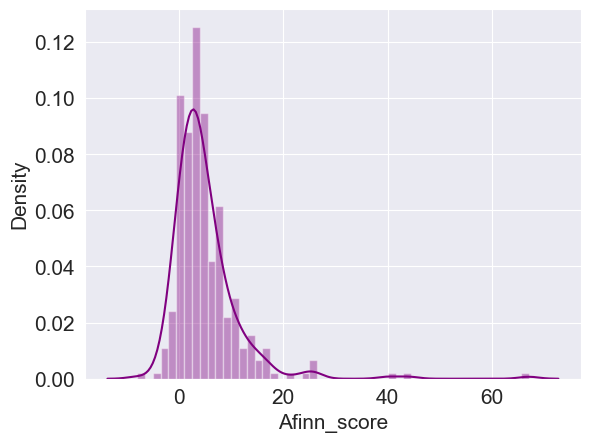

In [117]:
# Affin score visualization
sns.distplot(reviews['Afinn_score'], color='purple');

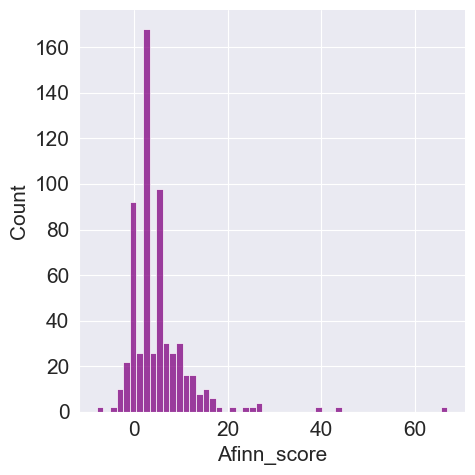

In [118]:
sns.displot(reviews['Afinn_score'],color='purple');
plt.show()

In [119]:
#Defining a function for Sentiment Analysis
def condition(x):
    if x>=20:
        return "Positive"
    else:
        return 'Negative'

In [120]:
#Applying condition on Afinn score
reviews['Affin_Sent'] = reviews['Afinn_score'].apply(condition)

In [121]:
#Reviewing the data
reviews[['MainReview','Detailed_Review','Rating', 'Afinn_score', 'Affin_Sent']]

MainReview  \
0             Touch screens are awesome.   
1                             Great buy!   
2                          Latitude 7440   
3                        The best laptop   
4                              Very Nice   
..                                   ...   
601                   Faulty motherboard   
602                      Dead on arrival   
603                          Bad Quality   
604  Hassles with installation of Win 11   
605                        Broken Device   

                                       Detailed_Review  Rating  Afinn_score  \
0      Great machine fast and I love the touch screen.       5          6.0   
1    Lightweight, easy to use. Good for day to day ...       5          4.0   
2    This system is amazing.  Sleek, fast, great re...       5         11.0   
3                       Very good laptop, thanks Dell!       5          5.0   
4    Excellent Workhorse ... Durable, Hi-Performanc...       5          5.0   
..                                                 ...     ...          ...   
601    Dell sent me a laptop with a faulty motherboard       1          0.0   
602  Laptop dead on arrival, still waiting on a rep...       1         -3.0   
603  Bad Quality, overheating, and keyboard/trackpa...       1         -1.0   
604  Laptop did not come with the required security...       1          0.0   
605  Laptop is broken and Customer Support is not h...       1          3.0   

    Affin_Sent  
0     Negative  
1     Negative  
2     Negative  
3     Negative  
4     Negative  
..         ...  
601   Negative  
602   Negative  
603   Negative  
604   Negative  
605   Negative  

[606 rows x 5 columns]

In [122]:
finalreviews=reviews[['MainReview','Detailed_Review','sentiment_final']].copy()

In [123]:
finalreviews

MainReview  \
0             Touch screens are awesome.   
1                             Great buy!   
2                          Latitude 7440   
3                        The best laptop   
4                              Very Nice   
..                                   ...   
601                   Faulty motherboard   
602                      Dead on arrival   
603                          Bad Quality   
604  Hassles with installation of Win 11   
605                        Broken Device   

                                       Detailed_Review sentiment_final  
0      Great machine fast and I love the touch screen.        Positive  
1    Lightweight, easy to use. Good for day to day ...        Positive  
2    This system is amazing.  Sleek, fast, great re...        Positive  
3                       Very good laptop, thanks Dell!        Positive  
4    Excellent Workhorse ... Durable, Hi-Performanc...        Positive  
..                                                 ...             ...  
601    Dell sent me a laptop with a faulty motherboard         Neutral  
602  Laptop dead on arrival, still waiting on a rep...        Negative  
603  Bad Quality, overheating, and keyboard/trackpa...        Negative  
604  Laptop did not come with the required security...         Neutral  
605  Laptop is broken and Customer Support is not h...        Negative  

[606 rows x 3 columns]

# Model Validation

# Splitting data into Train and Test

In [124]:
X=finalreviews['MainReview']
Y=finalreviews['sentiment_final']


In [125]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(X)

In [126]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
Y = le.fit_transform(Y)

In [127]:
from sklearn.model_selection import train_test_split

In [128]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size= 0.20, random_state=11)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(484, 440)
(484,)
(122, 440)
(122,)


# Model Building

# Logestic Regression

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV,KFold

In [130]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train,Y_train)

LogisticRegression()

In [131]:
# Testing the model
Y_predLR = lr_model.predict(X_test)
Y_predLR

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

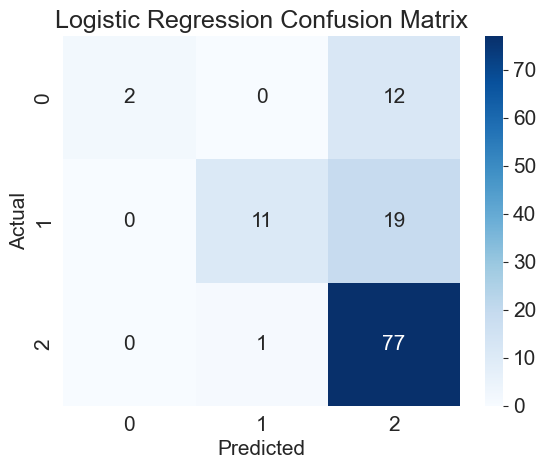

In [132]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(Y_test, Y_predLR)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [133]:
#Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
LR=confusion_matrix(Y_test,Y_predLR)
print(LR)
accuracy_score(Y_test,Y_predLR)

[[ 2  0 12]
 [ 0 11 19]
 [ 0  1 77]]


0.7377049180327869

In [134]:
print(classification_report(Y_test,lr_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.14      0.25        14
           1       0.92      0.37      0.52        30
           2       0.71      0.99      0.83        78

    accuracy                           0.74       122
   macro avg       0.88      0.50      0.53       122
weighted avg       0.80      0.74      0.69       122



# Model 2 : Naive Bayes

In [135]:
from sklearn.naive_bayes import MultinomialNB
NB_model=MultinomialNB()
NB_model.fit(X_train,Y_train)

MultinomialNB()

In [136]:
# Testing the model
Y_predNB = lr_model.predict(X_test)
Y_predNB

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2])

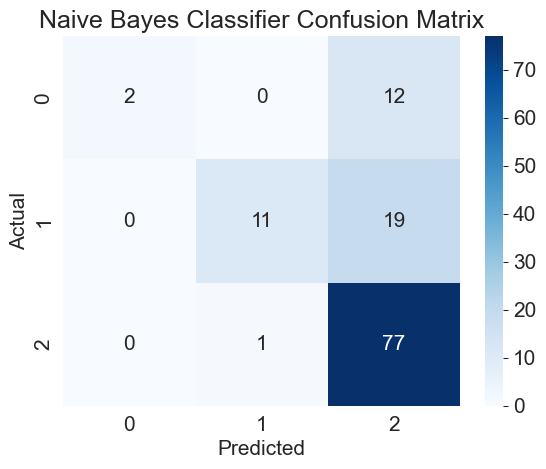

In [137]:
from sklearn.metrics import confusion_matrix
# Confusion matrix
cm = confusion_matrix(Y_test, Y_predNB)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Naive Bayes Classifier Confusion Matrix')
plt.show()

In [138]:
#Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
NB=confusion_matrix(Y_test,Y_predNB)
print(NB)
accuracy_score(Y_test,Y_predLR)

[[ 2  0 12]
 [ 0 11 19]
 [ 0  1 77]]


0.7377049180327869

In [139]:
print(classification_report(Y_test,NB_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.21      0.35        14
           1       1.00      0.27      0.42        30
           2       0.70      1.00      0.83        78

    accuracy                           0.73       122
   macro avg       0.90      0.49      0.53       122
weighted avg       0.81      0.73      0.67       122



#KNN Classifier

In [140]:
from sklearn.neighbors import KNeighborsClassifier
KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,Y_train)

KNeighborsClassifier()

In [141]:
# Testing the model
Y_predKNN = KNN_model.predict(X_test)
Y_predKNN

array([2, 2, 2, 2, 0, 2, 0, 2, 1, 1, 1, 1, 2, 1, 0, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 1,
       2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 1, 2,
       1, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1,
       0, 2, 2, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 1, 1, 2, 0, 1, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2])

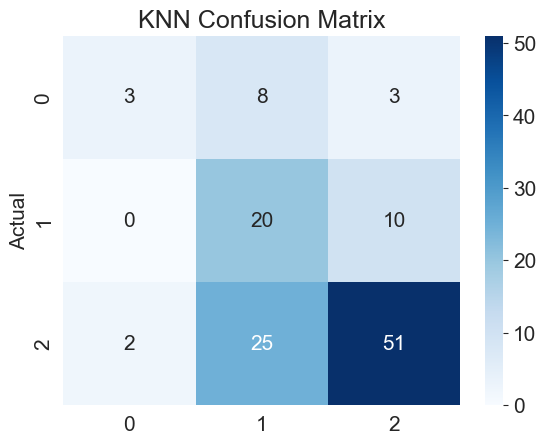

In [142]:
# Confusion matrix
cm = confusion_matrix(Y_test, Y_predKNN)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

In [143]:
#Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
KNN=confusion_matrix(Y_test,Y_predKNN)
print(KNN)
accuracy_score(Y_test,Y_predLR)

[[ 3  8  3]
 [ 0 20 10]
 [ 2 25 51]]


0.7377049180327869

In [144]:
print(classification_report(Y_test,KNN_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.60      0.21      0.32        14
           1       0.38      0.67      0.48        30
           2       0.80      0.65      0.72        78

    accuracy                           0.61       122
   macro avg       0.59      0.51      0.51       122
weighted avg       0.67      0.61      0.61       122



# Decision Tree

In [145]:
from sklearn.tree import DecisionTreeClassifier
DT_model=DecisionTreeClassifier()
DT_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [146]:
# Testing the model
Y_predDT = DT_model.predict(X_test)
Y_predDT

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2])

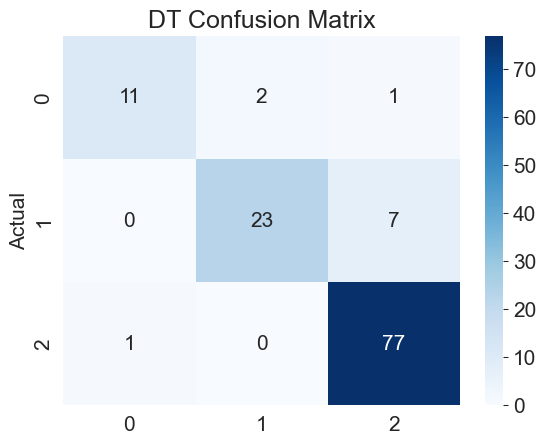

In [147]:
# Confusion matrix
cm = confusion_matrix(Y_test, Y_predDT)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Predicted')
plt.ylabel('Actual')
plt.title('DT Confusion Matrix')
plt.show()

In [148]:
#Confusion Matrix and Accuracy
from sklearn.metrics import confusion_matrix,accuracy_score
DT=confusion_matrix(Y_test,Y_predDT)
print(DT)

accuracy_score(Y_test, Y_predDT)

[[11  2  1]
 [ 0 23  7]
 [ 1  0 77]]


0.9098360655737705

In [149]:
print(classification_report(Y_test,DT_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.92      0.79      0.85        14
           1       0.92      0.77      0.84        30
           2       0.91      0.99      0.94        78

    accuracy                           0.91       122
   macro avg       0.91      0.85      0.88       122
weighted avg       0.91      0.91      0.91       122



## Random Forest

In [150]:
from sklearn.ensemble import RandomForestClassifier
RF_model=RandomForestClassifier()
RF_model.fit(X_train,Y_train)

RandomForestClassifier()

In [151]:
# Testing the model
Y_predRF = RF_model.predict(X_test)
Y_predRF

array([2, 2, 2, 2, 2, 2, 0, 2, 0, 1, 2, 1, 2, 0, 0, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 0, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2,
       0, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 0,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2])

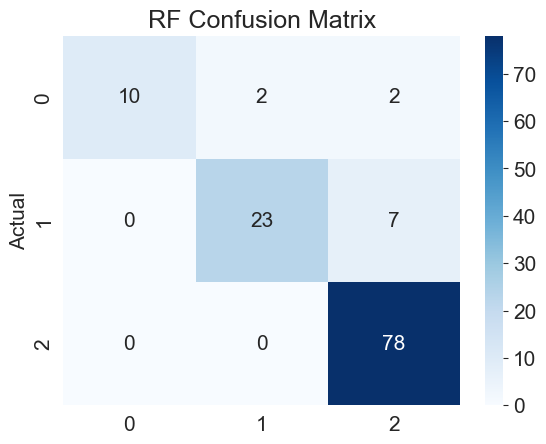

In [152]:
# Confusion matrix
cm = confusion_matrix(Y_test, Y_predRF)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.ylabel('Predicted')
plt.ylabel('Actual')
plt.title('RF Confusion Matrix')
plt.show()

In [153]:
#Confusion Matrix and Accuracy
RF=confusion_matrix(Y_test,Y_predRF)
print(RF)
accuracy_score(Y_test,Y_predRF)

[[10  2  2]
 [ 0 23  7]
 [ 0  0 78]]


0.9098360655737705

In [154]:
print(classification_report(Y_test,RF_model.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.92      0.77      0.84        30
           2       0.90      1.00      0.95        78

    accuracy                           0.91       122
   macro avg       0.94      0.83      0.87       122
weighted avg       0.91      0.91      0.91       122



In [155]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
}

# Initialize an empty DataFrame to store the results
results = pd.DataFrame(columns=['Algorithm', 'Precision', 'Recall', 'F1-Score'])

# Train and evaluate classifiers
for name, clf in classifiers.items():
    clf.fit(X_train, Y_train)
    y_pred = clf.predict(X_test)  # Ensure predictions are made before calling classification_report
    report = classification_report(Y_test, y_pred, output_dict=True)
    accuracy = accuracy_score(Y_test, y_pred)
    results = results.append({'Algorithm': name,
                              'Accuracy': accuracy,
                              'Precision': report['macro avg']['precision'],
                              'Recall': report['macro avg']['recall'],
                              'F1-Score': report['macro avg']['f1-score']},
                             ignore_index=True)

# Print the results in table format
print(results)


# Ignore warnings
warnings.filterwarnings("ignore")

             Algorithm  Precision    Recall  F1-Score  Accuracy
0  Logistic Regression   0.876543  0.498901  0.533922  0.737705
1        Decision Tree   0.890711  0.837973  0.861616  0.893443
2        Random Forest   0.923434  0.868742  0.893290  0.926230
3  K-Nearest Neighbors   0.591411  0.511600  0.505342  0.606557
4          Naive Bayes   0.900901  0.493651  0.533130  0.729508
